## KM3NeT Offline Summary Files

## User's Guide

The offline summary files use largely the same ROOT dataformat as the regular offline files. The data structures are defined in the [km3net-dataformat](https://git.km3net.de/common/km3net-dataformat) project. Event data is stored in the Evt class, who's documentation can be found here(https://common.pages.km3net.de/km3net-dataformat/structEvt.html)

In the summary files, the Evt objects contain a reduced set of information compared to the full offline files: All hits are removed and so are most of the Monte-Carlo and reconstructed tracks. Only the essential tracks for (most) analyses are maintained in the summary files.


### Mc Particles and Tracks

The summary files maintain only the 'best' reconstructed tracks of each reconstruction algorithm. For ARCA MC, this means only the final JGandal and aashowerfit tracks are maintained. The summary-production ensures these these are in fixed places in the `trks` vector and defines matching aliases for easy access (see section on aliases)

From the Monte-Carlo particle information, the incoming neutrino is maintained as well as -- for charged-current events - the primary lepton.


### Friend Tree

In addition to the offline Evt data-structure, the summary files contain a ROOT TTree with summary information. This information includes summary information on the hits and the tracks that have been removed to save space in the summary files. For the 'user' perspective, when using TTree::Draw, it appears as if the data in the friend tree is added to the main Evt tree
(see examples section).

The friend tree is named T. It has the following members:
```
----------------------------------------------------------------------------
name                       description                                       
----------------------------------------------------------------------------
sum_mc_trks                                                                  
sum_mc_trks.ntrks          number of mc tracks, excluding the neutrino       
sum_mc_trks.Etot           total energy of all MC tracks, excluding the ...  
sum_mc_trks.bx             Bjorken x                                         
sum_mc_trks.by             'Bjorken' y                                       
sum_mc_trks.ichan          ichan from the mc production                      
sum_mc_trks.cc             cc flag from the mc production                    
sum_mc_trks.atm_flux_numu  flux of (anti) numu at zenith and energy of t...  
sum_mc_trks.atm_flux_nue   flux of (anti) nue at zenith and energy of th...  
sum_mc_trks.posc_from_numu oscillation probabiliy from numu into the fla...  
sum_mc_trks.posc_from_nue  oscillation probabiliy from nue  into the fla...  
sum_mc_trks.atm_flux       total flux of flavour the neutrino after osci...  
sum_trks                                                                     
sum_trks.ntrks             original number of reco tracks (not very usef...  
sum_hits                                                                     
sum_hits.nhits             number of mc hits                                 
sum_hits.atot              total amplitude charge of all mc hits             
sum_hits.tmin              time of earliest / lastest hit                    
sum_hits.tmax              time of earliest / lastest hit                    
sum_hits.ndoms             number of DOMs with hits                          
sum_hits.nlines            number of lines with hits                         
sum_trig_hits                                                                
sum_trig_hits.nhits        number of mc hits                                 
sum_trig_hits.atot         total amplitude charge of all mc hits             
sum_trig_hits.tmin         time of earliest / lastest hit                    
sum_trig_hits.tmax         time of earliest / lastest hit                    
sum_trig_hits.ndoms        number of DOMs with hits                          
sum_trig_hits.nlines       number of lines with hits                         
sum_mc_hits                                                                  
sum_mc_hits.nhits          number of mc hits                                 
sum_mc_hits.atot           total amplitude charge of all mc hits             
sum_mc_hits.tmin           time of earliest / lastest hit                    
sum_mc_hits.tmax           time of earliest / lastest hit                    
sum_mc_hits.ndoms          number of DOMs with hits                          
sum_mc_hits.nlines         number of lines with hits                         
coords                                                                       
coords.mjd                 modified julian day                               
coords.nu_ra               right assension in j2000 system                   
coords.nu_dec              declination in j2000 system                       
coords.trackfit_ra         right assension in j2000 system                   
coords.trackfit_dec        declination in j2000 system                       
coords.showerfit_ra        right assension in j2000 system                   
coords.showerfit_dec       declination in j2000 system                       
```


### Header information

The tools that produce the summary files also maintain the integrety of the (monte carlo) header. The number of events and livetime fields in the header represent the joined live time of the summary file. 

As in the regular offline files, the Head object is written to the root file and it can be analysed in the same way. Alternatively, there are Aliases defined for many of the header items, so that these numbers can immediately be used in TTree::Draw-based analyses.


### Aliases

Aliases are a way to associate meaningful names to complex expressions in the context of ROOT TTrees. Currently 4 kinds aliases are defined for the main TTree:

 * track-names : nu, mu, trackfit and showerfit refer to trks[0], trks[1], mc_trks[0] and mc_trks[1] respectively
 * angle expressions : angle_nu_mu, angle_nu_trackfit, angle_nu_showerfit, angle_mu_trackfit, and angle_mu_showerfit are defined as an expression that corresponds to the angle between the corresponding tracks. 
 * Header items. Most entries from the MC header have an aliaes defined that evaluates to their (numerical) value. For example genvol.numberOfEvents evaluates to the corresponding entry from the header; this number is frequently needed when computing event rates.
 * osc_dm21, osc_dm32, osc_th12, osc_th23, osc_th13, osc_deltacp are defined to the numerical
   values used for computing oscillation probabilities sum_mc_trks.posc_*
  
The full list of aliases is as follows:
 
```
nu.id                     : mc_trks[0].id
nu.pos.x                  : mc_trks[0].pos.x
nu.pos.y                  : mc_trks[0].pos.y
nu.pos.z                  : mc_trks[0].pos.z
nu.dir.x                  : mc_trks[0].dir.x
nu.dir.y                  : mc_trks[0].dir.y
nu.dir.z                  : mc_trks[0].dir.z
nu.t                      : mc_trks[0].t
nu.E                      : mc_trks[0].E
nu.len                    : mc_trks[0].len
nu.lik                    : mc_trks[0].lik
nu.type                   : mc_trks[0].type
nu.rec_type               : mc_trks[0].rec_type
nu.rec_stages             : mc_trks[0].rec_stages
nu.status                 : mc_trks[0].status
nu.mother_id              : mc_trks[0].mother_id
nu.fitinf                 : mc_trks[0].fitinf
nu.hit_ids                : mc_trks[0].hit_ids
nu.error_matrix           : mc_trks[0].error_matrix
nu.comment                : mc_trks[0].comment
mu.id                     : mc_trks[1].id
mu.pos.x                  : mc_trks[1].pos.x
mu.pos.y                  : mc_trks[1].pos.y
mu.pos.z                  : mc_trks[1].pos.z
mu.dir.x                  : mc_trks[1].dir.x
mu.dir.y                  : mc_trks[1].dir.y
mu.dir.z                  : mc_trks[1].dir.z
mu.t                      : mc_trks[1].t
mu.E                      : mc_trks[1].E
mu.len                    : mc_trks[1].len
mu.lik                    : mc_trks[1].lik
mu.type                   : mc_trks[1].type
mu.rec_type               : mc_trks[1].rec_type
mu.rec_stages             : mc_trks[1].rec_stages
mu.status                 : mc_trks[1].status
mu.mother_id              : mc_trks[1].mother_id
mu.fitinf                 : mc_trks[1].fitinf
mu.hit_ids                : mc_trks[1].hit_ids
mu.error_matrix           : mc_trks[1].error_matrix
mu.comment                : mc_trks[1].comment
trackfit.id               : trks[0].id
trackfit.pos.x            : trks[0].pos.x
trackfit.pos.y            : trks[0].pos.y
trackfit.pos.z            : trks[0].pos.z
trackfit.dir.x            : trks[0].dir.x
trackfit.dir.y            : trks[0].dir.y
trackfit.dir.z            : trks[0].dir.z
trackfit.t                : trks[0].t
trackfit.E                : trks[0].E
trackfit.len              : trks[0].len
trackfit.lik              : trks[0].lik
trackfit.type             : trks[0].type
trackfit.rec_type         : trks[0].rec_type
trackfit.rec_stages       : trks[0].rec_stages
trackfit.status           : trks[0].status
trackfit.mother_id        : trks[0].mother_id
trackfit.fitinf           : trks[0].fitinf
trackfit.hit_ids          : trks[0].hit_ids
trackfit.error_matrix     : trks[0].error_matrix
trackfit.comment          : trks[0].comment
showerfit.id              : trks[1].id
showerfit.pos.x           : trks[1].pos.x
showerfit.pos.y           : trks[1].pos.y
showerfit.pos.z           : trks[1].pos.z
showerfit.dir.x           : trks[1].dir.x
showerfit.dir.y           : trks[1].dir.y
showerfit.dir.z           : trks[1].dir.z
showerfit.t               : trks[1].t
showerfit.E               : trks[1].E
showerfit.len             : trks[1].len
showerfit.lik             : trks[1].lik
showerfit.type            : trks[1].type
showerfit.rec_type        : trks[1].rec_type
showerfit.rec_stages      : trks[1].rec_stages
showerfit.status          : trks[1].status
showerfit.mother_id       : trks[1].mother_id
showerfit.fitinf          : trks[1].fitinf
showerfit.hit_ids         : trks[1].hit_ids
showerfit.error_matrix    : trks[1].error_matrix
showerfit.comment         : trks[1].comment
angle_nu_mu               : 57.29577951308232*acos(nu.dir.x*mu.dir.x+nu.dir.y*mu.dir.y+nu.dir.z*mu.dir.z)
angle_nu_trackfit         : 57.29577951308232*acos(nu.dir.x*trackfit.dir.x+nu.dir.y*trackfit.dir.y+nu.dir.z*trackfit.dir.z)
angle_nu_showerfit        : 57.29577951308232*acos(nu.dir.x*showerfit.dir.x+nu.dir.y*showerfit.dir.y+nu.dir.z*showerfit.dir.z)
angle_mu_trackfit         : 57.29577951308232*acos(mu.dir.x*trackfit.dir.x+mu.dir.y*trackfit.dir.y+mu.dir.z*trackfit.dir.z)
angle_mu_showerfit        : 57.29577951308232*acos(mu.dir.x*showerfit.dir.x+mu.dir.y*showerfit.dir.y+mu.dir.z*showerfit.dir.z)
osc_dm21,                 : ((7.4e-05,))     [ numbers below may differ for other files]
osc_dm32,                 : ((0.002494,))
osc_th12,                 : ((0.5868,))
osc_th23,                 : ((0.8238,))
osc_th13,                 : ((0.1491,))
osc_deltacp               : (4.084070449666731)
PDF.i1                    : (4)
PDF.i2                    : (58)
can.zmin                  : (0)
can.zmax                  : (1027)
can.r                     : (888.4)
coord_origin.x            : (0)
coord_origin.y            : (0)
coord_origin.z            : (0)
cut_in.Emin               : (0)
cut_in.Emax               : (0)
cut_in.cosTmin            : (0)
cut_in.cosTmax            : (0)
cut_nu.Emin               : (100)
cut_nu.Emax               : (1e+08)
cut_nu.cosTmin            : (-1)
cut_nu.cosTmax            : (1)
cut_primary.Emin          : (0)
cut_primary.Emax          : (0)
cut_primary.cosTmin       : (0)
cut_primary.cosTmax       : (0)
cut_seamuon.Emin          : (0)
cut_seamuon.Emax          : (0)
cut_seamuon.cosTmin       : (0)
cut_seamuon.cosTmax       : (0)
genhencut.gDir            : (2000)
genhencut.Emin            : (0)
genvol.zmin               : (0)
genvol.zmax               : (1027)
genvol.r                  : (888.4)
genvol.volume             : (2.649e+09)
genvol.numberOfEvents     : (4e+06)
livetime.numberOfSeconds  : (0)
livetime.errorOfSeconds   : (0)
model.interaction         : (1)
model.muon                : (2)
model.scattering          : (0)
model.numberOfEnergyBins  : (1)
norma.primaryFlux         : (0)
norma.numberOfPrimaries   : (0)
physics.program           : (GENHEN)
physics.version           : (7.2-220514)
physics.date              : (181116)
physics.time              : (1140)
seed.program              : (GENHEN)
seed.level                : (3)
seed.iseed                : (165121258)
simul.program             : (KM3)
simul.version             : (v5r7-200418)
simul.date                : (181116)
simul.time                : (1147)
spectrum.alpha            : (-1.4)
start_run.run_id          : (1)
translate.x               : (-58.7517)
translate.y               : (26.5000)
translate.z               : (0.0000)
```


### Examples

Here are a few examples demonstrating the use of the summary files

In [10]:
# summary files can be analysed using bare ROOT, without addional libaries

import ROOT
f = ROOT.TFile("/sps/km3net/users/heijboer/dstprod/v6/mcv5.1.km3.res_numuCC.ALL.dst.root")
E = f.Get("E")

In [11]:
# how many entries in the tree?
E.GetEntries()


802872

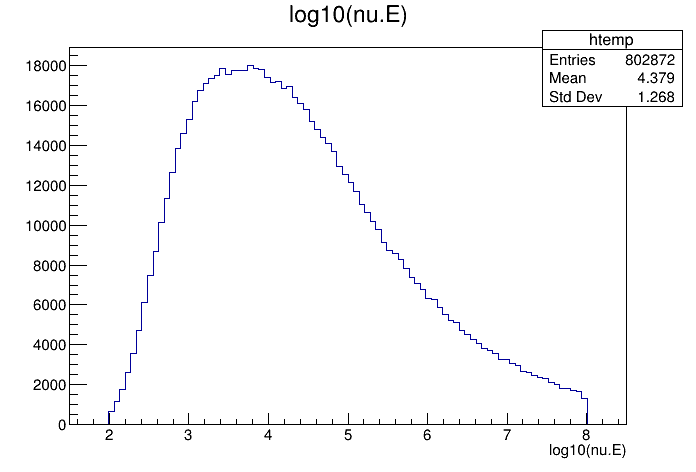

In [13]:
# plot the neutrino energy ; this uses the 'nu' alias

E.Draw("log10(nu.E)")
ROOT.gPad.Draw()

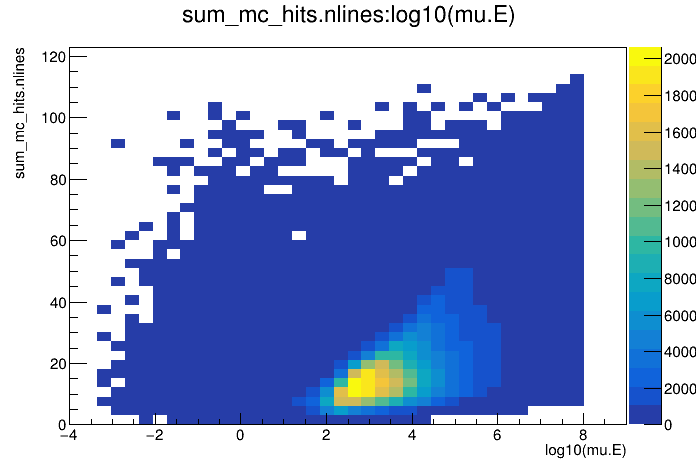

In [16]:
# Plot the number of hit lines (using mc-hits) against the muon energy.
# hitsum_mc_hits.nlines comes from the T (friend) TTree, but it can be
# used as if part of the E tree. This also uses the alias 'mu'

E.Draw("sum_mc_hits.nlines:log10(mu.E)","","colz")
ROOT.gPad.Draw()

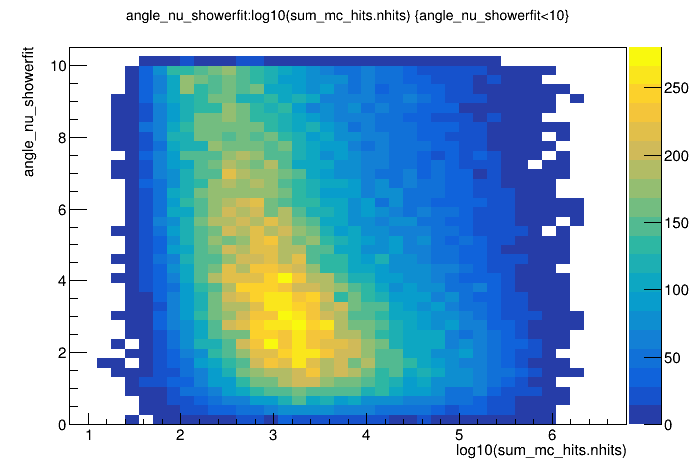

In [20]:
# plot the shower-angular resolution vs the number of hits

E.Draw("angle_nu_showerfit:log10(sum_mc_hits.nhits)","angle_nu_showerfit<10","colz")
ROOT.gPad.Draw()


Warning in <TFile::Append>: Replacing existing TH1: haeff (Potential memory leak).


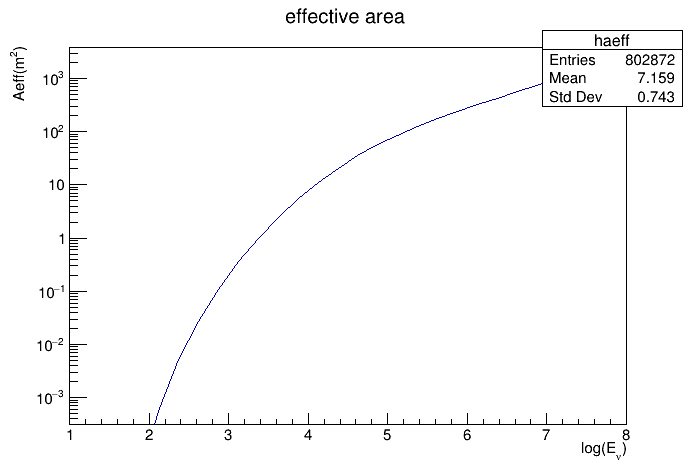

In [26]:
# For plotting event rates, and effective area's, we need genvol.numberOfEvents from
# the header. Note the expression genvol.numberOfEvents is used directly in the
# Draw command below.
# following https://git.km3net.de/common/aanet/-/blob/master/examples/notebook/05%20-%20Effective%20Area.ipynb

haeff  = ROOT.TH1D("haeff","effective area;log(E_{#nu});Aeff(m^{2})", 28, 1,8 )
E.Draw( "log10(nu.E)>>+haeff","w[1]/nu[0].E/genvol.numberOfEvents" ,"goff")
haeff.Scale ( 1 / ( log(10) * haeff.GetBinWidth(1) * 3600.0 * 24 * 365 * 4*pi ))
haeff.Draw("Lhist")
ROOT.gPad.SetLogy()
ROOT.gPad.Draw()


In [9]:
# an easy way to view the aliases (including the header information)
for x in  E.GetListOfAliases() :
    print(x)

Name: nu.id Title: mc_trks[0].id
Name: nu.pos.x Title: mc_trks[0].pos.x
Name: nu.pos.y Title: mc_trks[0].pos.y
Name: nu.pos.z Title: mc_trks[0].pos.z
Name: nu.dir.x Title: mc_trks[0].dir.x
Name: nu.dir.y Title: mc_trks[0].dir.y
Name: nu.dir.z Title: mc_trks[0].dir.z
Name: nu.t Title: mc_trks[0].t
Name: nu.E Title: mc_trks[0].E
Name: nu.len Title: mc_trks[0].len
Name: nu.lik Title: mc_trks[0].lik
Name: nu.type Title: mc_trks[0].type
Name: nu.rec_type Title: mc_trks[0].rec_type
Name: nu.rec_stages Title: mc_trks[0].rec_stages
Name: nu.status Title: mc_trks[0].status
Name: nu.mother_id Title: mc_trks[0].mother_id
Name: nu.fitinf Title: mc_trks[0].fitinf
Name: nu.hit_ids Title: mc_trks[0].hit_ids
Name: nu.error_matrix Title: mc_trks[0].error_matrix
Name: nu.comment Title: mc_trks[0].comment
Name: mu.id Title: mc_trks[1].id
Name: mu.pos.x Title: mc_trks[1].pos.x
Name: mu.pos.y Title: mc_trks[1].pos.y
Name: mu.pos.z Title: mc_trks[1].pos.z
Name: mu.dir.x Title: mc_trks[1].dir.x
Name: mu.dir.

In [29]:
# the 'meta inforamtion is stored in the dst_history directory'

f.Get("dst_history").ls()

TDirectoryFile*		dst_history	dst_history
 KEY: TNamed	command_line;9	./join_files.py -f prod/v6/attic/mcv5.1.km3.res_numuCC.0.dst.root prod/v6/attic/mcv5.1.km3.res_numuCC.1.dst.root prod/v6/attic/mcv5.1.km3.res_numuCC.2.dst.root prod/v6/attic/mcv5.1.km3.res_numuCC.3.dst.root prod/v6/attic/mcv5.1.km3.res_numuCC.4.dst.root prod/v6/attic/mcv5.1.km3.res_numuCC.5.dst.root prod/v6/attic/mcv5.1.km3.res_numuCC.6.dst.root prod/v6/attic/mcv5.1.km3.res_numuCC.7.dst.root -o prod/v6/attic/mcv5.1.km3.res_numuCC.ALL.dst.root
 KEY: TNamed	command_line;8	/pbs/home/h/heijboer/aanet/ana/dst/make_dst.py -f /sps/km3net/repo/mc/atm_neutrino/KM3NeT_-00000001_20171212/v5.1_res/reco/mcv5.1_res.genhen_numuCC.km3_AAv1.jte.jchain.aashower.69.root /sps/km3net/repo/mc/atm_neutrino/KM3NeT_-00000001_20171212/v5.1_res/reco/mcv5.1_res.genhen_numuCC.km3_AAv1.jte.jchain.aashower.111.root /sps/km3net/repo/mc/atm_neutrino/KM3NeT_-00000001_20171212/v5.1_res/reco/mcv5.1_res.genhen_numuCC.km3_AAv1.jte.jchain.aashower.199.root

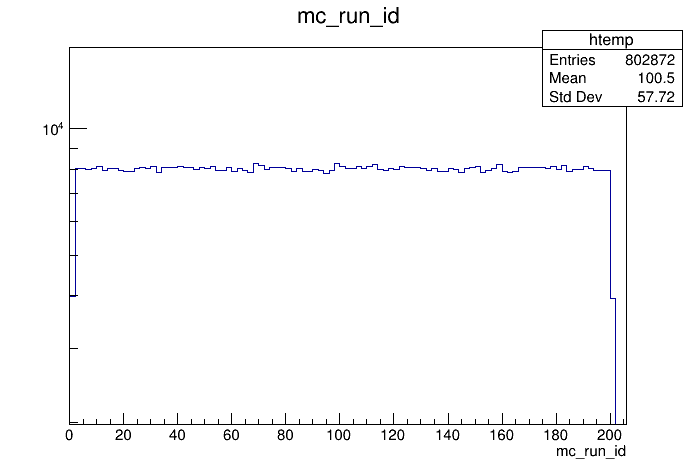

In [31]:
E.Draw("mc_run_id")
ROOT.gPad.Draw()